In [10]:
# !pip install tabulate

import random
from tabulate import tabulate
import plotly.express  as px
import plotly.io as pio

In [11]:
# function that takes in gene and returns the reward/penalty allocated

def get_reward(gene,test = False):
    n = length_of_atom = 3

    primary_conflict = 0
    secondary_conflict = 0

    random = gene
    new_list = [random[i:i+n] for i in range(0, len(random), n)]

    # separate into according to subject group 
    table_student_group_1 = [] 
    table_student_group_2 = [] 
    table_student_group_3 = []

    # according to classes
    table_class_1 = []
    table_class_2 = []
    table_class_3 = []
    # chromosome is the 3 atoms that represent classes at a certain time slot 
    # i.e classes in sunday 9-11 time slot
    chromosomes = []

    # tables 
    for j in range(0, len(new_list)):
        if (new_list[j][1]== 'a'):
            table_student_group_1.append(new_list[j])
        elif (new_list[j][1]== 'b'):
            table_student_group_2.append(new_list[j])
        elif (new_list[j][1]== 'c'):
            table_student_group_3.append(new_list[j])

    for j in range(0, len(new_list)):
        if (new_list[j][2]== '1'):
            table_class_1.append(new_list[j])
        elif (new_list[j][2]== '2'):
            table_class_2.append(new_list[j])
        elif (new_list[j][2]== '3'):
            table_class_3.append(new_list[j])


    # separate into chromosomes ie. 3 atoms representing classes at a time
    
    for i in range(0, len(gene), 9):
        chromosome = gene[i:i+9]
        chromosomes.append(chromosome)
        group_count = {combo: 0 for combo in 'abc'}
        class_count = {combo: 0 for combo in '123'}
        # check if two classes at the same classroom
        # and check if two subject group at same time
        if test == True:
            print(chromosome)
        for a in range(0,3):
            if chromosome[2+3*a] in '123':
                class_count[chromosome[2+3*a]] += 1
            if chromosome[1+3*a] in 'abc':
                group_count[chromosome[1+3*a]] += 1
        
        # main checking part
        if  (max([a for a in group_count.values()])>1):
            primary_conflict+=1
        
            if test == True:
                # for testing only
                print(f"group conflict in chromosone {i/9}")

        if  (max([a for a in class_count.values()])>1):
            primary_conflict+=1
            if test == True:
                # for testing only
                print(f"class conflict in chromosone {i/9}")
            
    # to take into account more or less than 18 classes of a subject group 
    if len(table_student_group_1) != 18:primary_conflict += 1
    if len(table_student_group_2) != 18:primary_conflict += 1
    if len(table_student_group_3) != 18:primary_conflict += 1

    ###########################################################
    # For Secondary Conflicts
    
    # Once subject more than twice or less then once per week
    # Check student group table individually, if subject represented by "ABCDEF"
    # is not repeated exactly twice, then conflict occurs
    # count conflict for each repeated occurance of subject and for each student group table    
    if test == True:
        print(table_student_group_1)


    # For student_group_a
    subject_repetitions_count = {combo: 0 for combo in 'ABCDEF'}
    for i in table_student_group_1:
        if i[0] in subject_repetitions_count:
            subject_repetitions_count[i[0]] += 1

    for subject_repetitions_key in subject_repetitions_count.keys():
        if subject_repetitions_count[subject_repetitions_key]!=2:
            secondary_conflict += abs(abs(subject_repetitions_count[subject_repetitions_key])-2)
            
            if test == True:
                # for testing only
                print(f"subject {subject_repetitions_key} is repeated {subject_repetitions_count[subject_repetitions_key]} times")
                #

    if test == True:
        print(table_student_group_2)

    # For student_group_b
    subject_repetitions_count = {combo: 0 for combo in 'ABCDEF'}
    for i in table_student_group_2:
        if i[0] in subject_repetitions_count:
            subject_repetitions_count[i[0]] += 1

    for subject_repetitions_key in subject_repetitions_count.keys():
        if subject_repetitions_count[subject_repetitions_key]!=2:
            secondary_conflict += abs(abs(subject_repetitions_count[subject_repetitions_key])-2)

            if test == True:
                # for testing only
                print(f"subject {subject_repetitions_key} is repeated {subject_repetitions_count[subject_repetitions_key]} times")
                #
            

    if test == True:
        print(table_student_group_3)
    # For student_group_c
    subject_repetitions_count = {combo: 0 for combo in 'ABCDEF'}
    for i in table_student_group_3:
        if i[0] in subject_repetitions_count:
            subject_repetitions_count[i[0]] += 1

    for subject_repetitions_key in subject_repetitions_count.keys():
        if subject_repetitions_count[subject_repetitions_key]!=2:
            secondary_conflict += abs(abs(subject_repetitions_count[subject_repetitions_key])-2) 
            
            if test == True:
                # for testing only
                print(subject_repetitions_count)
                print(f"subject {subject_repetitions_key} is repeated {subject_repetitions_count[subject_repetitions_key]} times")
                #                
    reward = primary_conflict*-100 -50*secondary_conflict
    return reward

In [12]:
random.seed(0)
prob = 0.49

def create_gene():
    '''
    create chromosome or string of genes
    Ruby
    '''
    possible_combinations = [f"{subject}{group}{classroom}" for subject in "ABCDEFG" for group in "abc" for classroom in "123"]
    a = ''
    for i in range (0,54) : 
        random_num = random.choice(possible_combinations)
        a = a + str(random_num)
    return a

def pick_an_atom_for_me(atom_1,atom_2):
    possible_combinations = [f"{subject}{group}{classroom}" for subject in "ABCDEFG" for group in "abc" for classroom in "123"]
    x = random.uniform(0, 1)
    if x <= prob:
        return atom_1
    elif x <= prob*2:
        return atom_2
    return random.choice(possible_combinations)

def give_me_my_child(parent_1,parent_2):
    n = size_of_atom = 3 
    child = []
    parent_1_separated_into_atoms = [parent_1[i:i+n] for i in range(0, len(parent_1), size_of_atom)]
    parent_2_separated_into_atoms = [parent_1[i:i+n] for i in range(0, len(parent_2), size_of_atom)]
    for i in range(len(parent_1_separated_into_atoms)):
        child.append(pick_an_atom_for_me(parent_1_separated_into_atoms[i],parent_2_separated_into_atoms[i]))
    return ''.join(child)

def sort_my_genes(unsorted_list):
    test_list = []
    sorted_list = []
    for i in unsorted_list:
        test_list.append((i,get_reward(i)))
    test_list.sort(key = lambda x: x[1],reverse=True)
    for i in test_list:
        sorted_list.append(i[0])
    return sorted_list

def genetic_algotithm(list_of_parent_genes):
    # Crossbreeding
    children_genes = []
    for j in range(3):
        random.shuffle(list_of_parent_genes)
        for i in range(0,len(list_of_parent_genes)-1):
            children_genes.append(give_me_my_child(list_of_parent_genes[i],list_of_parent_genes[i+1]))
        # for i in range(0,int(len(list_of_parent_genes)/2)):
        #     children_genes.append(give_me_my_child(list_of_parent_genes[i],list_of_parent_genes[i+1]))
                
        
    children_genes = sort_my_genes(children_genes)
    return children_genes[0:500]

def get_my_average_reward(generation):
    total_reward = 0
    gen = generation[0:200]
    for i in gen:
        total_reward += get_reward(i)
    return total_reward/len(gen)

rewards_data = []

def run_my_algo():

    ancestory = []
    gen_temp = []
    gen_temp2 = []

    for i in range(0,500):
        gen_temp.append(create_gene())

    # for i in range(0,500):
    #     gen_temp2.append(create_gene())
    gen_temp2 = gen_temp
    #print(gen_temp2)

    #print(get_my_average_reward(gen_temp))
    ancestory.append(get_my_average_reward(gen_temp))
    print(f"my average reward is {ancestory[0]} for gen {0}")

    for i in range(0,550):
        gen_temp = genetic_algotithm(gen_temp)
        ancestory.append(get_my_average_reward(gen_temp))
        print(f"my average reward is {ancestory[i+1]} for gen {i+1}")
        if i == 300: prob= 0.45
        if i == 445: prob= 0.49
        if ancestory[i+1] == 0:
            break
        


    return ancestory,gen_temp

all_rewards,reward5 = run_my_algo()

my average reward is -4197.5 for gen 0
my average reward is -3663.0 for gen 1
my average reward is -3514.25 for gen 2
my average reward is -3356.25 for gen 3
my average reward is -3210.5 for gen 4
my average reward is -3066.75 for gen 5
my average reward is -2919.75 for gen 6
my average reward is -2780.0 for gen 7
my average reward is -2665.25 for gen 8
my average reward is -2564.0 for gen 9
my average reward is -2474.0 for gen 10
my average reward is -2410.75 for gen 11
my average reward is -2355.0 for gen 12
my average reward is -2301.5 for gen 13
my average reward is -2248.75 for gen 14
my average reward is -2205.25 for gen 15
my average reward is -2164.75 for gen 16
my average reward is -2131.75 for gen 17
my average reward is -2088.5 for gen 18
my average reward is -2048.0 for gen 19
my average reward is -2004.5 for gen 20
my average reward is -1950.75 for gen 21
my average reward is -1913.5 for gen 22
my average reward is -1875.75 for gen 23
my average reward is -1841.25 for gen 

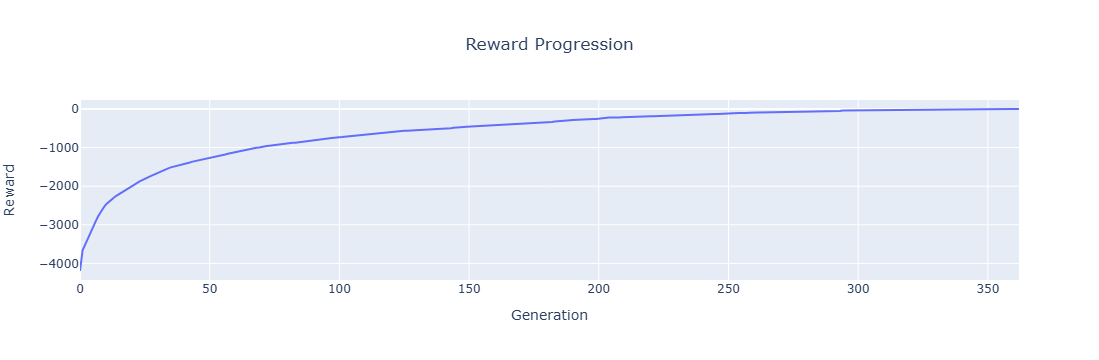

In [13]:
fig = px.line(x=list(range(len(all_rewards))), y=all_rewards, 
              labels={'x': 'Generation', 'y': 'Reward'}, title='Reward Progression') 
fig.update_layout(title_x=0.5)
fig.show()

In [14]:
print(reward5[0])
print(reward5[420])



Aa1Cc3Fb2Eb3Ga2Gc1Da2Gb3Gc1Dc3Eb1Ga2Bb3Ec2Fa1Db1Gc3Ca2Ab3Fc1Ba2Bb1Ea3Dc2Ga3Gb1Ec2Gc3Ea1Ab2Ac2Ga1Gb3Bc2Ca3Cb1Fb3Da2Bc1Aa1Gb2Ac3Gb2Gc3Fa1Ba1Db2Gc3Fc2Ga1Cb3Cc3Ga2Gb1
Aa1Cc3Fb2Eb3Ga2Gc1Da2Gb3Gc1Dc3Eb1Ga2Bb3Ec2Fa1Db1Gc3Ca2Ab3Fc1Ba2Bb1Ea3Dc2Ga3Gb1Ec2Gc3Ea1Ab2Ac2Ga1Gb3Bc2Ca3Cb1Fb3Da2Bc1Aa1Ab2Ac3Gb2Gc3Fa1Ba1Db2Gc3Fc2Ga1Cb3Cc3Ga2Gb1


In [15]:
def display(gene):
        '''
        Convert the gene code to a user understandable table
        Shambhav
        '''
        random = gene
        
        courses = ["PHYS 101","MATH 101","MATH 103","CHEM 101","BIOL 103","COMP 102","Break",
                   "MCSC 201","MATH 201","MATH 204","MATH 208","COMP 202","EEEG 202","Break",
                   "MATH 302","MATH 304","MATH 326","MGTS 301","COMP 315","COMP 316","Break"]
        #splitting the string into 3 elements each
        n = 3
        new_list = [random[i:i+n] for i in range(0, len(random), n)]

        days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
        a = []
        b = []
        c = []
        for j in range(0, len(new_list)):
            x = new_list[j][1]
            y = new_list[j][0]
            i = 7 * (ord(x) - ord('a')) + (ord(y)- ord('A'))
            if ( x == 'a'):
                a.append(courses[i])
            if ( x == 'b'):
                b.append(courses[i])
            if ( x == 'c'):
                c.append(courses[i])

        t_1 = [[a[j + i*3] for i in range(6)] for j in range(3)]
        t_2 = [[b[j + i*3] for i in range(6)] for j in range(3)]
        t_3 = [[c[j + i*3] for i in range(6)] for j in range(3)]
        print()
        print("                       Routine for 1st SEMESTER")
        print(tabulate(t_1, headers = days, tablefmt="fancy_grid"))
        print()
        print("                       Routine for 3rd SEMESTER")
        print(tabulate(t_2, headers = days, tablefmt="fancy_grid"))
        print()
        print("                       Routine for 5th SEMESTER")
        print(tabulate(t_3, headers = days, tablefmt="fancy_grid"))

In [16]:
display(reward5[0])


                       Routine for 1st SEMESTER
╒══════════╤══════════╤═══════════╤═════════════╤════════════╤══════════╕
│ Sunday   │ Monday   │ Tuesday   │ Wednesday   │ Thursday   │ Friday   │
╞══════════╪══════════╪═══════════╪═════════════╪════════════╪══════════╡
│ PHYS 101 │ Break    │ MATH 101  │ BIOL 103    │ CHEM 101   │ MATH 101 │
├──────────┼──────────┼───────────┼─────────────┼────────────┼──────────┤
│ Break    │ COMP 102 │ BIOL 103  │ Break       │ PHYS 101   │ Break    │
├──────────┼──────────┼───────────┼─────────────┼────────────┼──────────┤
│ CHEM 101 │ MATH 103 │ Break     │ MATH 103    │ COMP 102   │ Break    │
╘══════════╧══════════╧═══════════╧═════════════╧════════════╧══════════╛

                       Routine for 3rd SEMESTER
╒══════════╤══════════╤═══════════╤═════════════╤════════════╤══════════╕
│ Sunday   │ Monday   │ Tuesday   │ Wednesday   │ Thursday   │ Friday   │
╞══════════╪══════════╪═══════════╪═════════════╪════════════╪══════════╡
│ EEEG 202 │ C

In [17]:
display(reward5[420])


                       Routine for 1st SEMESTER
╒══════════╤══════════╤═══════════╤═════════════╤════════════╤══════════╕
│ Sunday   │ Monday   │ Tuesday   │ Wednesday   │ Thursday   │ Friday   │
╞══════════╪══════════╪═══════════╪═════════════╪════════════╪══════════╡
│ PHYS 101 │ Break    │ MATH 101  │ BIOL 103    │ CHEM 101   │ MATH 101 │
├──────────┼──────────┼───────────┼─────────────┼────────────┼──────────┤
│ Break    │ COMP 102 │ BIOL 103  │ Break       │ PHYS 101   │ Break    │
├──────────┼──────────┼───────────┼─────────────┼────────────┼──────────┤
│ CHEM 101 │ MATH 103 │ Break     │ MATH 103    │ COMP 102   │ Break    │
╘══════════╧══════════╧═══════════╧═════════════╧════════════╧══════════╛

                       Routine for 3rd SEMESTER
╒══════════╤══════════╤═══════════╤═════════════╤════════════╤══════════╕
│ Sunday   │ Monday   │ Tuesday   │ Wednesday   │ Thursday   │ Friday   │
╞══════════╪══════════╪═══════════╪═════════════╪════════════╪══════════╡
│ EEEG 202 │ C

In [9]:
len(reward5)

500